<h1><b>Import Libraries<b><h1>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import time
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

<h1><b>Input Data from Yahoo Finance<b><h1>

In [30]:
import yfinance as yf

ticker = 'ICICIBANK.NS'
start_date = '2022-01-01'
end_date = '2024-02-21'

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [31]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,743.049988,766.000000,743.000000,764.700012,753.932556,9653095
2022-01-04,767.950012,778.000000,763.599976,772.849976,761.967834,12114437
2022-01-05,773.000000,795.849976,771.200012,788.049988,776.953796,19741360
2022-01-06,775.049988,792.500000,774.000000,785.049988,773.996033,13018067
2022-01-07,792.200012,802.299988,786.250000,793.250000,782.080566,12250210
...,...,...,...,...,...,...
2024-02-14,1009.549988,1035.699951,1007.549988,1022.700012,1022.700012,17878720
2024-02-15,1022.849976,1026.650024,1006.599976,1016.650024,1016.650024,10069878
2024-02-16,1023.200012,1026.199951,1016.900024,1023.250000,1023.250000,7159395


<h1><b>Plotting closing price for every day<b><h1>

Text(0, 0.5, 'Value')

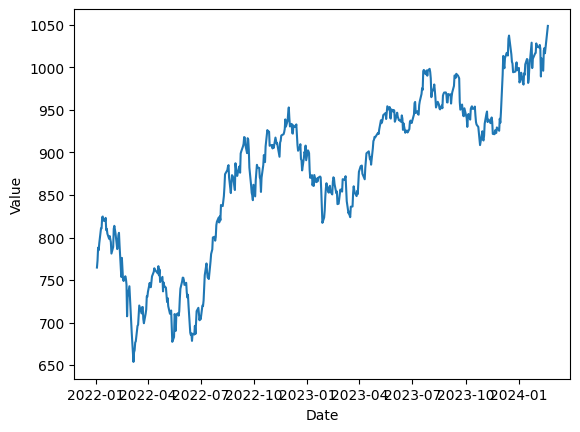

In [32]:
plt.plot(df.Close)
plt.xlabel('Date')
plt.ylabel('Value')

<h1><b>Closing Price Prediction<b></h1>

In [33]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

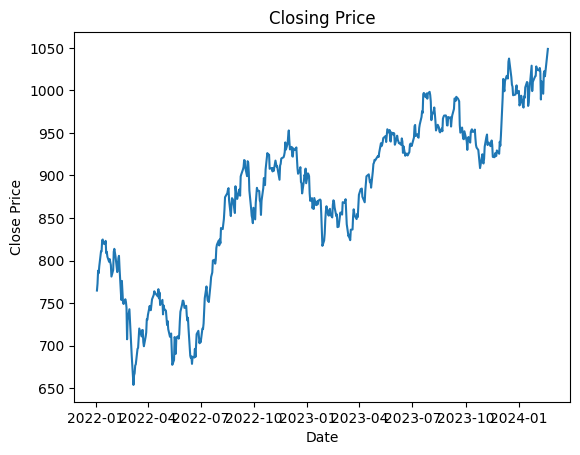

In [34]:
plt.figure()
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [35]:
import math

data=df.filter(['Close'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

423

In [36]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.28088611],
       [0.30151893],
       [0.33999997],
       [0.33240503],
       [0.35316456],
       [0.39746835],
       [0.39721525],
       [0.43037975],
       [0.43278484],
       [0.42088608],
       [0.41911389],
       [0.42873412],
       [0.39202525],
       [0.39620253],
       [0.38164557],
       [0.36632914],
       [0.37443044],
       [0.35670892],
       [0.32253171],
       [0.3418987 ],
       [0.39632908],
       [0.40506329],
       [0.39291142],
       [0.38303794],
       [0.33582285],
       [0.35126582],
       [0.37734174],
       [0.38417722],
       [0.34696199],
       [0.25303801],
       [0.30962022],
       [0.27924048],
       [0.2445569 ],
       [0.24088614],
       [0.25493674],
       [0.24696199],
       [0.22999994],
       [0.13582285],
       [0.19316453],
       [0.2251899 ],
       [0.15468348],
       [0.11278478],
       [0.08683541],
       [0.        ],
       [0.02848101],
       [0.03468358],
       [0.05784804],
       [0.061

In [37]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(70, len(train_data)):
    x_train.append(train_data[i-70:i,0])
    y_train.append(train_data[i,0])
    if i<=70:
        print(x_train)
        print(y_train)
        print()

[array([0.28088611, 0.30151893, 0.33999997, 0.33240503, 0.35316456,
       0.39746835, 0.39721525, 0.43037975, 0.43278484, 0.42088608,
       0.41911389, 0.42873412, 0.39202525, 0.39620253, 0.38164557,
       0.36632914, 0.37443044, 0.35670892, 0.32253171, 0.3418987 ,
       0.39632908, 0.40506329, 0.39291142, 0.38303794, 0.33582285,
       0.35126582, 0.37734174, 0.38417722, 0.34696199, 0.25303801,
       0.30962022, 0.27924048, 0.2445569 , 0.24088614, 0.25493674,
       0.24696199, 0.22999994, 0.13582285, 0.19316453, 0.2251899 ,
       0.15468348, 0.11278478, 0.08683541, 0.        , 0.02848101,
       0.03468358, 0.05784804, 0.0611393 , 0.10734183, 0.11037969,
       0.13734177, 0.16797462, 0.1443038 , 0.16316459, 0.16341769,
       0.12772155, 0.11518987, 0.14329108, 0.15582275, 0.19531652,
       0.19379744, 0.20886076, 0.23506323, 0.22291136, 0.222405  ,
       0.23999997, 0.25455693, 0.26797462, 0.27873412, 0.27468354])]
[0.2634176906151109]



In [38]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [39]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(353, 70, 1)

<h1><b>Model Training<b></h1>

In [40]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(100, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(50,activation='relu'))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1,activation='relu'))

In [41]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=50 )

Epoch 1/50
353/353 [==============================] - 7s 14ms/step - loss: 0.0059
Epoch 2/50
353/353 [==============================] - 5s 14ms/step - loss: 0.0032
Epoch 3/50
353/353 [==============================] - 5s 14ms/step - loss: 0.0028
Epoch 4/50
353/353 [==============================] - 5s 14ms/step - loss: 0.0018
Epoch 5/50
353/353 [==============================] - 5s 14ms/step - loss: 0.0014
Epoch 6/50
353/353 [==============================] - 5s 14ms/step - loss: 0.0013
Epoch 7/50
353/353 [==============================] - 5s 14ms/step - loss: 0.0012
Epoch 8/50
353/353 [==============================] - 5s 14ms/step - loss: 0.0011
Epoch 9/50
353/353 [==============================] - 5s 14ms/step - loss: 0.0012
Epoch 10/50
353/353 [==============================] - 5s 14ms/step - loss: 0.0011
Epoch 11/50
353/353 [==============================] - 5s 14ms/step - loss: 0.0011
Epoch 12/50
353/353 [==============================] - 5s 14ms/step - loss: 0.0013
Epoch 13/50
3

<h1><b>Testing and Validating Model<b></h1>

In [47]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-70: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(70, len(test_data)):
    x_test.append(test_data[i-70:i,0])

In [48]:
#Convert the data to a numpy array

x_test=np.array(x_test)

In [49]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [50]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


4/4 [==============================] - 1s 19ms/step


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse =np.sqrt(np.mean(predictions-y_test)**2)



print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error: 169.0301735351483
Mean Absolute Error: 10.196783156622024
Root Mean Squared Error: 4.641739908854166
Mean Absolute Percentage Error (MAPE): 1.034455866827913


C:\Users\soham\AppData\Local\Temp\ipykernel_9980\3539927776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


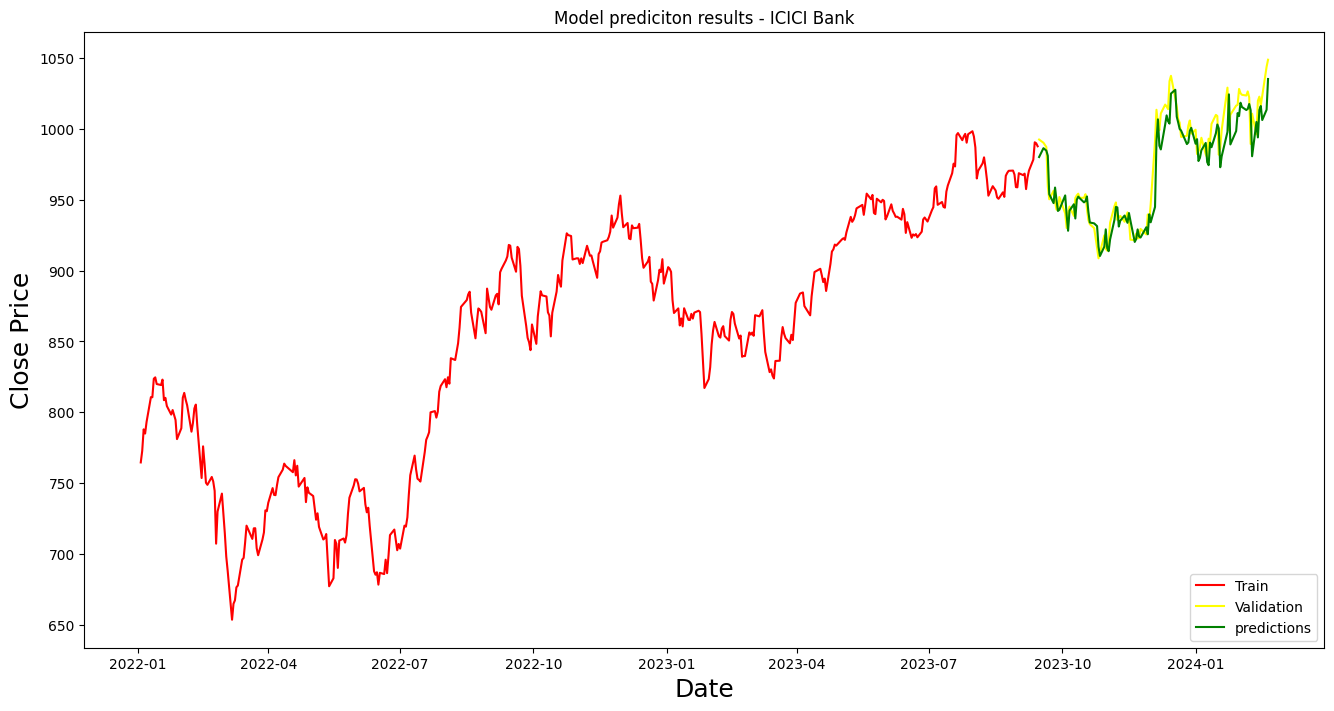

In [52]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model prediciton results - ICICI Bank')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(valid['Close'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.show()

In [53]:
#Show the valid and predicted prices

valid.tail(20)

,Close,predictions
Date,,
2024-01-23,1029.050049,997.843384
2024-01-24,999.200012,1024.322021
2024-01-25,1009.950012,988.987427
2024-01-29,1016.400024,998.456177
2024-01-30,1016.900024,1011.095703
2024-01-31,1028.150024,1008.998047
2024-02-01,1025.150024,1018.411926
2024-02-02,1024.000000,1015.387024
2024-02-05,1023.500000,1013.279724


<h1><b>Getting Predictions for Tomorrow<b></h1>

In [55]:
#Get the quote
ticker = 'ICICIBANK.NS'
start_date = '2022-01-01'
end_date = '2024-02-20'
stock_quote = yf.download(ticker, start=start_date, end=end_date)

new_df=stock_quote.filter(['Close'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Price of {ticker} tomorrow:{pred_price}')

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 20ms/step
Price of ICICIBANK.NS tomorrow:[[1035.1521]]


<h1><b>Getting Predictions for 60 days from now<b></h1>

In [57]:
import yfinance as yf
import numpy as np

# Assuming you have the necessary imports and the 'model' and 'scaler' objects are defined

# Get the historical stock data
ticker = 'ICICIBANK.NS'
start_date = '2022-01-01'
end_date = '2023-11-30'
stock_quote = yf.download(ticker, start=start_date, end=end_date)

# Extract 'Close' prices
new_df = stock_quote.filter(['Close'])

# Take the last 60 days of 'Close' prices and scale them
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list to store predicted prices
predicted_prices = []

# Number of days to forecast (adjust as needed)
forecast_days = 60

# Loop through the forecast period
for _ in range(forecast_days):
    # Reshape the data for prediction
    X_test = np.array([last_60_days_scaled])
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Get predicted scaled price
    pred_price = model.predict(X_test)

    # Undo the scaling
    pred_price = scaler.inverse_transform(pred_price)

    # Append the predicted price to the list
    predicted_prices.append(pred_price[0, 0])

    # Update last_60_days for the next iteration
    last_60_days = np.append(last_60_days[1:], [pred_price[0]], axis=0)
    last_60_days_scaled = scaler.transform(last_60_days)

# Print the predicted prices for the next 60 days
for i, price in enumerate(predicted_prices, 1):
    print(f'Day {i}: Predicted Closing Price of {ticker}: {price}')


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 19ms/step
Day 1: Predicted Closing Price of ICICIBANK.NS: 939.7142944335938
Day 2: Predicted Closing Price of ICICIBANK.NS: 939.0178833007812
Day 3: Predicted Closing Price of ICICIBANK.NS: 936.3511962890625
Day 4: Predicted Closing Price of ICICIBANK.NS: 934.4384765625
Day 5: Predicted Closing Price of ICICIBANK.NS: 933.497314453125
Day 6: Predicted Closing Price of ICICIBANK.NS: 933.2005615234375
Day 7: Predicted Closing Price of ICICIBANK.NS: 933.1393432617188
Day 8: Predicted Closing Price of ICICIBANK.NS: 933.078125
Day 9: Predicted Closing Price of ICICIBANK.NS: 932.9461059570312
Day 10: Predicted Closing Price of ICICIBANK.NS: 932.7574462890625
Day 11: Predicted Closing Price of ICICIBANK.NS: 932.5474853515625
Day 12: Predicted Closing Price of ICICIBANK.NS: 932.3419799804688
Day 13: Predicted Closing Price of ICICIBANK.NS: 932.15185546875
Day 14: Predicted Closing Pric